In [1]:
import os, sys
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import json


import osmnx as ox
import geopandas as gpd
from shapely.geometry import Polygon

%matplotlib inline


In [2]:
cd ../..

D:\Research\kaatru


In [3]:
# CONFIGS
DATA_DIR = "data"

# OSM data pulling

In [2]:
india = gpd.read_file(os.path.join(DATA_DIR,"boundaries","india.shp"))
ambattur = india[(india["name"]=='Ambattur')]
ambattur.set_crs("epsg:4326")
ambattur.plot()

NameError: name 'gpd' is not defined

In [1]:
ambattur.head()

NameError: name 'ambattur' is not defined

In [6]:
tags = {"landuse": True}
gdf = ox.geometries_from_polygon(ambattur.geometry.values[0], tags)
gdf.shape

(132, 33)

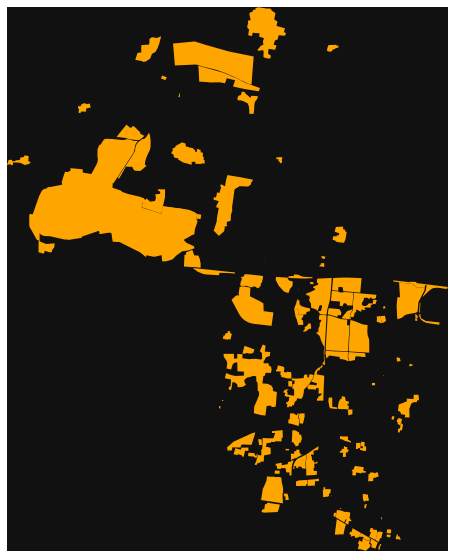

In [7]:
fig, ax = ox.plot_footprints(gdf, figsize=(15, 10))

In [8]:
gdf.head()

landuse                      name  \
element_type osmid                                                
node         1185699947    commercial  Avadi Telephone Exchange   
             4490212220   residential  Alliance Orchid Springss   
             10013621146  residential            Aakash enclave   
             10013621147  residential              Athiar court   
way          28225303      commercial               DLF IT Park   

                                                                   geometry  \
element_type osmid                                                            
node         1185699947                           POINT (80.11755 13.12460)   
             4490212220                           POINT (80.19365 13.12686)   
             10013621146                          POINT (80.20162 13.12606)   
             10013621147                          POINT (80.20160 13.12453)   
way          28225303     POLYGON ((80.17747 13.02434, 80.17718 13.02448...   

                         addr:city addr:housenumber addr:postcode  \
element_type osmid                                                  
node         1185699947        NaN              NaN           NaN   
             4490212220    chennai            No.54        600080   
             10013621146       NaN              NaN           NaN   
             10013621147       NaN              NaN           NaN   
way          28225303          NaN              NaN           NaN   

                                                                addr:street  \
element_type osmid                                                            
node         1185699947                                                 NaN   
             4490212220   Water Canal Road, Before DRJ Hospital,, Near A...   
             10013621146                                                NaN   
             10013621147                                                NaN   
way          28225303                                                   NaN   

                         residential                        website barrier  \
element_type osmid                                                            
node         1185699947          NaN                            NaN     NaN   
             4490212220   apartments  https://www.orchidsprings.in/     NaN   
             10013621146  apartments                            NaN     NaN   
             10013621147  apartments                            NaN     NaN   
way          28225303            NaN                            NaN     NaN   

                          ... level leaf_type building:levels plant:method  \
element_type osmid        ...                                                
node         1185699947   ...   NaN       NaN             NaN          NaN   
             4490212220   ...   NaN       NaN             NaN          NaN   
             10013621146  ...   NaN       NaN             NaN          NaN   
             10013621147  ...   NaN       NaN             NaN          NaN   
way          28225303     ...   NaN       NaN             NaN          NaN   

                         plant:output:electricity plant:source plant:type  \
element_type osmid                                                          
node         1185699947                       NaN          NaN        NaN   
             4490212220                       NaN          NaN        NaN   
             10013621146                      NaN          NaN        NaN   
             10013621147                      NaN          NaN        NaN   
way          28225303                         NaN          NaN        NaN   

                         power ways type  
element_type osmid                        
node         1185699947    NaN  NaN  NaN  
             4490212220    NaN  NaN  NaN  
             10013621146   NaN  NaN  NaN  
             10013621147   NaN  NaN  NaN  
way          28225303      NaN  NaN  NaN  

[5 rows x 33 columns]

In [28]:
points=gdf[gdf['geometry'].apply(lambda x : x.type=='Point' )]
lines=gdf[gdf['geometry'].apply(lambda x : x.type=='LineString' )]
polygons=gdf[gdf['geometry'].apply(lambda x : x.type=='Polygon' )]
gdf2write=polygons[['landuse','geometry','name']]
gdf2write.to_file(os.path.join(DATA_DIR,"shrivarshan","ambattur_lulc.shp"))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_948\2029244242.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf2write.to_file(os.path.join(DATA_DIR,"shrivarshan","ambattur_lulc.shp"))


<AxesSubplot:>

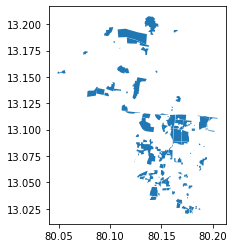

In [29]:
polyg=gpd.read_file(os.path.join(DATA_DIR,"shrivarshan","ambattur_lulc.shp"))
polyg.plot()

<AxesSubplot:>

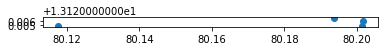

In [31]:
points.plot()

In [20]:
polygons.head(2)

addr:housenumber building  \
element_type osmid                                 
way          31256476               NaN      yes   
             102547890              NaN      yes   

                                                                     name  \
element_type osmid                                                          
way          31256476                                                 NaN   
             102547890  Tiruvalithayam Tiruvallesvarar Temple - Gurust...   

                                                                 geometry  \
element_type osmid                                                          
way          31256476   POLYGON ((80.12215 13.11653, 80.12327 13.11642...   
             102547890  POLYGON ((80.18688 13.09764, 80.18682 13.09714...   

                       office addr:city  \
element_type osmid                        
way          31256476     NaN       NaN   
             102547890    NaN       NaN   

                                                              addr:street  \
element_type osmid                                                          
way          31256476                                                 NaN   
             102547890  Sivan Kovil Road, Padi, Chennai, Tamil Nadu 60...   

                                 amenity addr:locality addr:postcode  ...  \
element_type osmid                                                    ...   
way          31256476                NaN           NaN           NaN  ...   
             102547890  place_of_worship           NaN           NaN  ...   

                       payment:cryptocurrencies payment:debit_cards  \
element_type osmid                                                    
way          31256476                       NaN                 NaN   
             102547890                      NaN                 NaN   

                       payment:electronic_purses payment:google_pay  \
element_type osmid                                                    
way          31256476                        NaN                NaN   
             102547890                       NaN                NaN   

                       payment:visa roof:shape ways townhall:type type  ele  
element_type osmid                                                           
way          31256476           NaN        NaN  NaN           NaN  NaN  NaN  
             102547890          NaN        NaN  NaN           NaN  NaN  NaN  

[2 rows x 82 columns]